<a href="https://colab.research.google.com/github/CristianBaqui/Taller-Computaci-n-Python/blob/main/TallerPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Taller de Análisis de Datos Pokémon con Python y Pandas

## Configuración Inicial

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar el dataset
pokemon = pd.read_csv('/content/Pokemon.csv')

### Desafío 1: Tipo más balanceado
**Objetivo**: Encontrar qué tipo primario tiene Pokémon con estadísticas más equilibradas.

**Instrucciones**:
1. Calcula la desviación estándar de las 6 estadísticas de combate para cada Pokémon individual (usa `std(axis=1)`)
2. Agrupa por tipo primario y calcula el promedio de estas desviaciones
3. Ordena los resultados para encontrar los tipos más balanceados (menor desviación promedio)
4. Muestra los 5 tipos más balanceados en formato tabla
5. Crea un barplot con los 8 tipos más balanceados


In [51]:
# Mostrar información básica del dataset
print("Forma del dataset:", pokemon.shape)
print("\nPrimeras 5 filas:")
print(pokemon.head())

print("\nInformación del dataset:")
print(pokemon.info())

print("\nColumnas con valores nulos:")
print(.isnull().sum())

SyntaxError: invalid syntax (ipython-input-51-993607795.py, line 10)

In [ ]:
#Ejercicio 1.2: Estadísticas descriptivas

# Estadísticas básicas de las columnas numéricas
print("Estadísticas descriptivas:")
print(pokemon.describe())

# Estadísticas específicas
print(f"\nPokémon más fuerte (Total): {pokemon.loc[pokemon['Total'].idxmax(), 'Name']}")
print(f"Puntuación máxima: {pokemon['Total'].max()}")

print(f"\nPokémon más débil (Total): {pokemon.loc[pokemon['Total'].idxmin(), 'Name']}")
print(f"Puntuación mínima: {pokemon['Total'].min()}")

In [ ]:
#Parte 2: Análisis por Tipos
#Ejercicio 2.1: Conteo de tipos primarios

# Contar Pokémon por tipo primario
tipo_counts = pokemon['Type1'].value_counts()
print("Distribución de tipos primarios:")
print(tipo_counts)

# Visualización: Barplot de tipos más comunes (top 10)
plt.figure(figsize=(12, 6))
tipo_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Tipos Primarios Más Comunes')
plt.xlabel('Tipo Primario')
plt.ylabel('Cantidad de Pokémon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Estadísticas de fuerza por tipo:
                mean  max  min  count
Type1                                
Dragon    550.531250  780  300     32
Steel     487.703704  700  300     27
Flying    485.000000  580  245      4
Psychic   475.947368  780  198     57
Fire      458.076923  680  250     52
Rock      453.750000  700  280     44
Dark      445.741935  680  220     31
Electric  443.409091  610  205     44
Ghost     439.562500  680  275     32
Ground    437.500000  770  265     32
Ice       433.458333  580  250     24
Water     430.455357  770  200    112
Grass     421.142857  630  180     70
Fighting  416.444444  625  210     27
Fairy     413.176471  680  218     17
Normal    401.683673  720  190     98
Poison    399.142857  535  245     28
Bug       378.927536  600  194     69


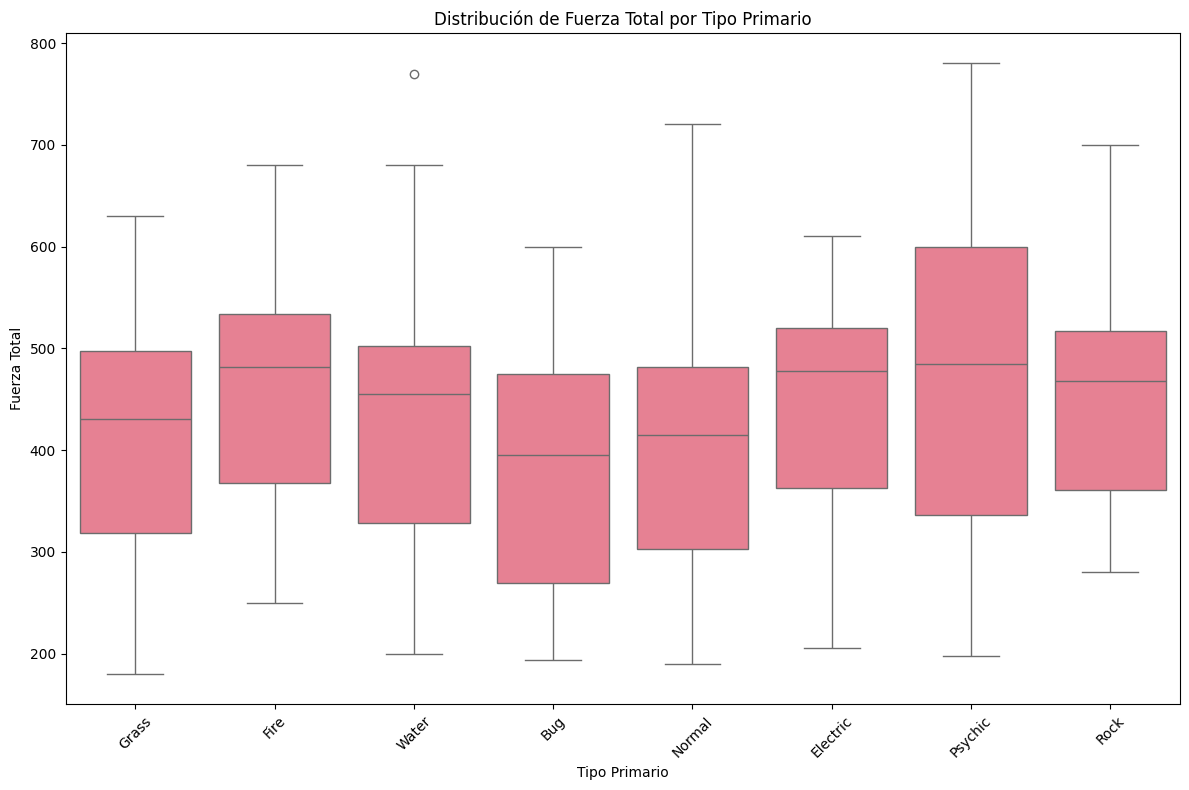

In [52]:
#Ejercicio 2.2: Análisis de fuerza por tipo

# Estadísticas de Total por tipo primario
stats_por_tipo = pokemon.groupby('Type1')['Total'].agg(['mean', 'max', 'min', 'count'])
stats_por_tipo = stats_por_tipo.sort_values('mean', ascending=False)
print("Estadísticas de fuerza por tipo:")
print(stats_por_tipo)

# Boxplot: Distribución de fuerza por tipo (top 8 tipos más comunes)
top_tipos = pokemon['Type1'].value_counts().head(8).index
pokemon_top_tipos = pokemon[pokemon['Type1'].isin(top_tipos)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=pokemon_top_tipos, x='Type1', y='Total')
plt.title('Distribución de Fuerza Total por Tipo Primario')
plt.xlabel('Tipo Primario')
plt.ylabel('Fuerza Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

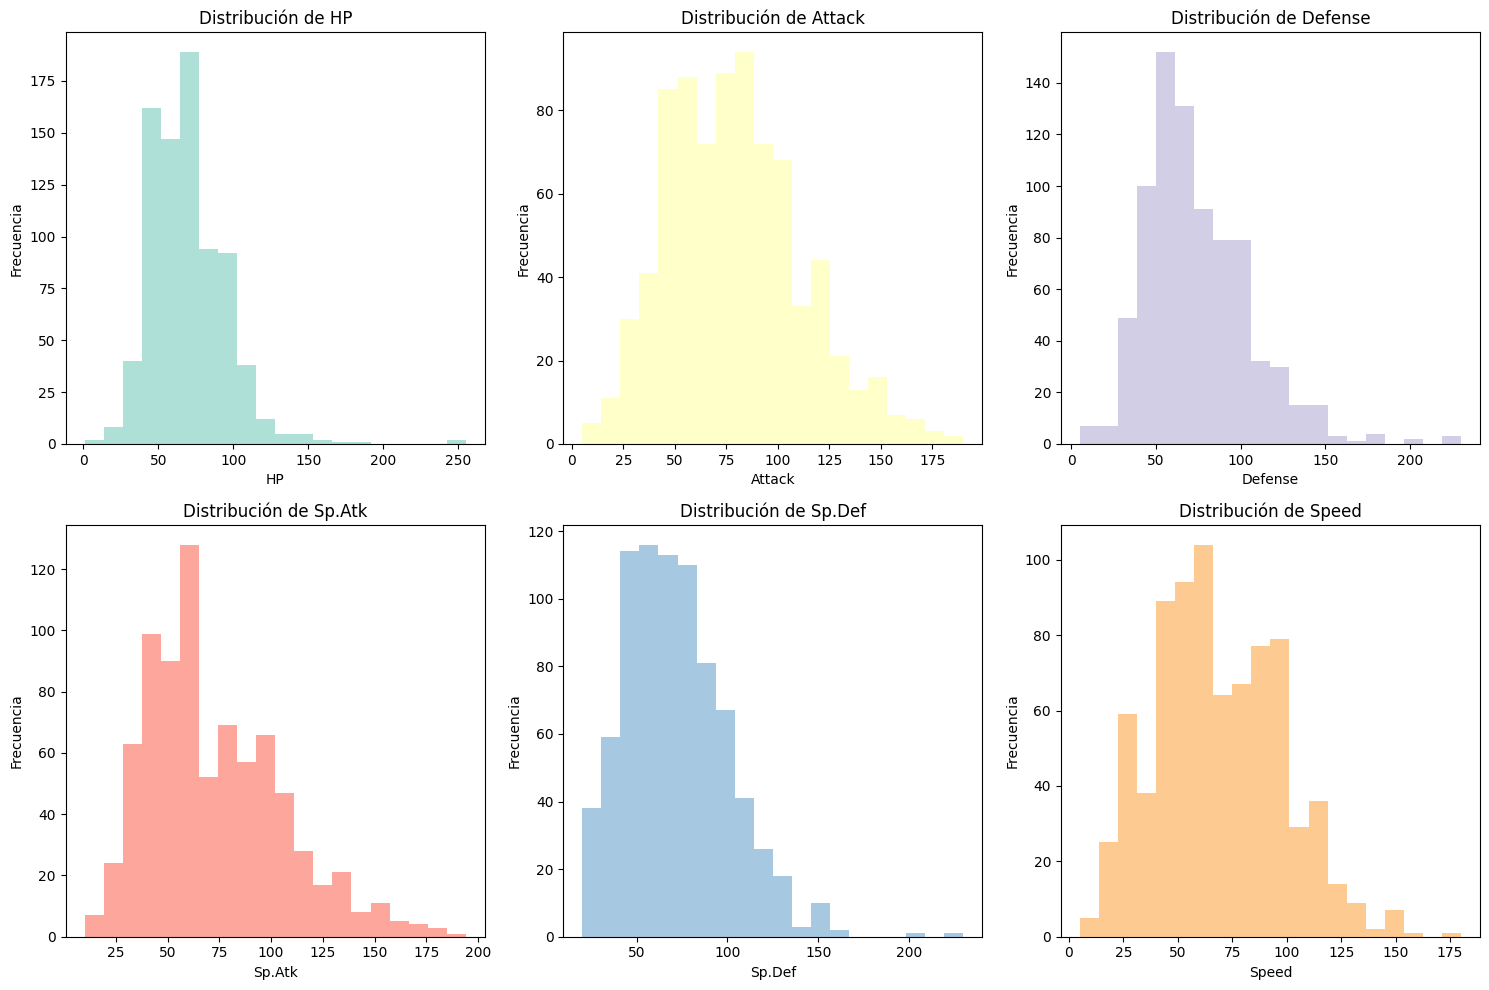

In [53]:
#Parte 3: Análisis de Estadísticas de Combate
#Ejercicio 3.1: Distribución de estadísticas

# Histogramas de las principales estadísticas
stats_combate = ['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, stat in enumerate(stats_combate):
    axes[i].hist(pokemon[stat], bins=20, alpha=0.7, color=plt.cm.Set3(i))
    axes[i].set_title(f'Distribución de {stat}')
    axes[i].set_xlabel(stat)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Matriz de correlación:
               HP    Attack   Defense    Sp.Atk    Sp.Def     Speed     Total
HP       1.000000  0.422386  0.239622  0.362380  0.378718  0.175952  0.618748
Attack   0.422386  1.000000  0.438687  0.396362  0.263990  0.381240  0.736211
Defense  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227  0.612787
Sp.Atk   0.362380  0.396362  0.223549  1.000000  0.506121  0.473018  0.747250
Sp.Def   0.378718  0.263990  0.510747  0.506121  1.000000  0.259133  0.717609
Speed    0.175952  0.381240  0.015227  0.473018  0.259133  1.000000  0.575943
Total    0.618748  0.736211  0.612787  0.747250  0.717609  0.575943  1.000000


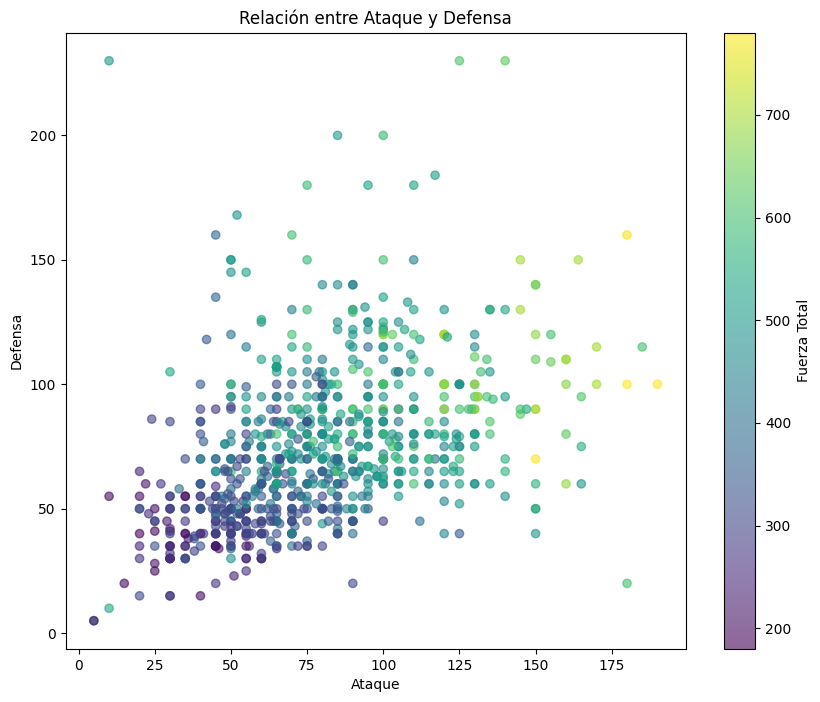

In [54]:
#Ejercicio 3.2: Correlación entre estadísticas

# Matriz de correlación
correlacion = pokemon[['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed', 'Total']].corr()
print("Matriz de correlación:")
print(correlacion)

# Scatter plot: Attack vs Defense
plt.figure(figsize=(10, 8))
plt.scatter(pokemon['Attack'], pokemon['Defense'], alpha=0.6, c=pokemon['Total'], cmap='viridis')
plt.colorbar(label='Fuerza Total')
plt.xlabel('Ataque')
plt.ylabel('Defensa')
plt.title('Relación entre Ataque y Defensa')
plt.show()

=== POKÉMON CON ESTADÍSTICAS EXTREMAS ===

Mayor HP: Blissey (255)

Mayor Attack: MewtwoMega Mewtwo X (190)

Mayor Defense: SteelixMega Steelix (230)

Mayor Sp.Atk: MewtwoMega Mewtwo Y (194)

Mayor Sp.Def: Shuckle (230)

Mayor Speed: DeoxysSpeed Forme (180)


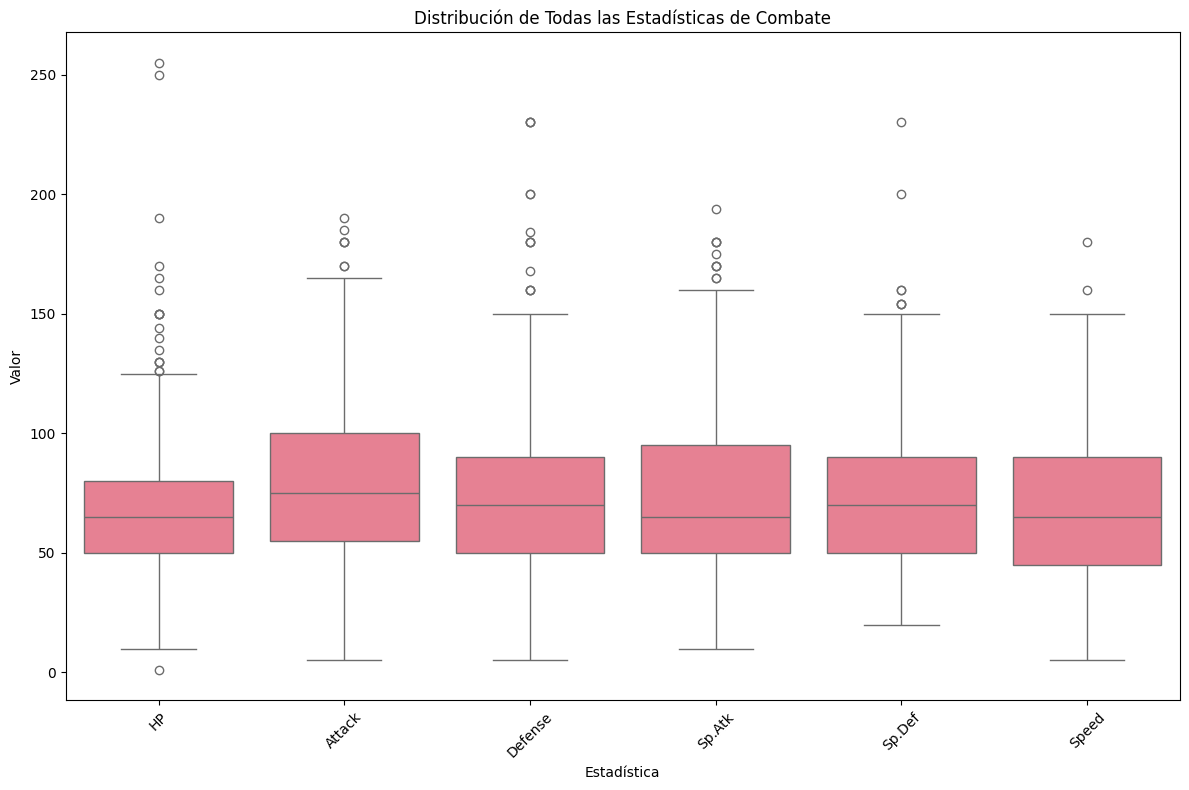

In [55]:
#Ejercicio 3.3: Pokémon especializados

# Encontrar Pokémon con estadísticas extremas
print("=== POKÉMON CON ESTADÍSTICAS EXTREMAS ===")

stats = ['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed']
for stat in stats:
    max_pokemon = pokemon.loc[pokemon[stat].idxmax()]
    print(f"\nMayor {stat}: {max_pokemon['Name']} ({max_pokemon[stat]})")

# Boxplot comparativo de todas las estadísticas
pokemon_stats = pokemon[['Name'] + stats].melt(id_vars='Name', var_name='Estadística', value_name='Valor')

plt.figure(figsize=(12, 8))
sns.boxplot(data=pokemon_stats, x='Estadística', y='Valor')
plt.title('Distribución de Todas las Estadísticas de Combate')
plt.xlabel('Estadística')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Estadísticas por generación:
            Cantidad  Promedio_Total  Max_Total  Legendarios
Generation                                                  
1                166          426.81        780            6
2                106          418.28        700            5
3                160          436.22        780           18
4                121          459.02        720           13
5                165          434.99        700           15
6                 82          436.38        700            8


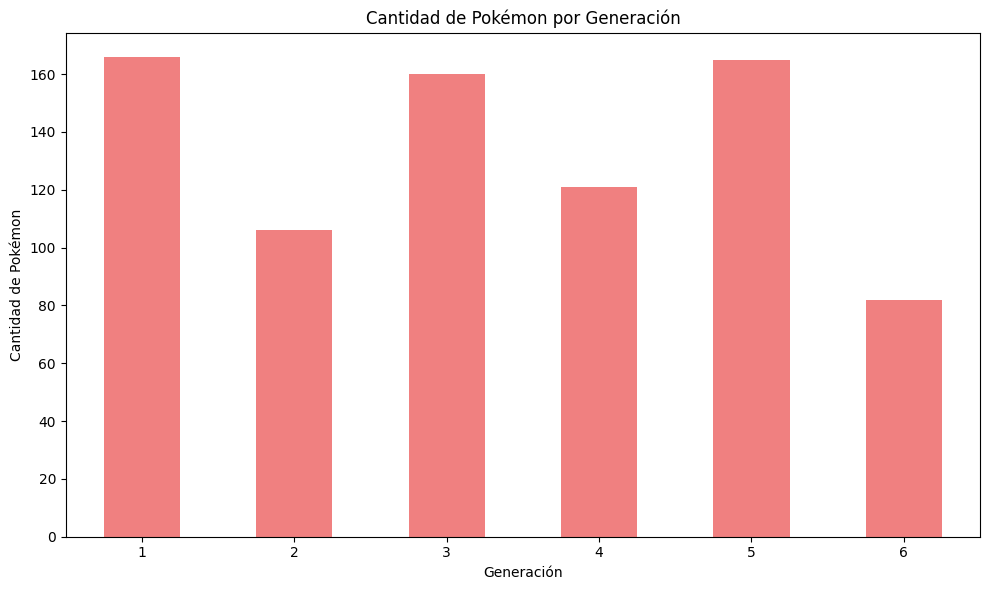

In [56]:
#Parte 4: Análisis por Generación
#Ejercicio 4.1: Evolución por generaciones

# Estadísticas por generación
gen_stats = pokemon.groupby('Generation').agg({
    'Name': 'count',
    'Total': ['mean', 'max'],
    'Legendary': 'sum'
}).round(2)

gen_stats.columns = ['Cantidad', 'Promedio_Total', 'Max_Total', 'Legendarios']
print("Estadísticas por generación:")
print(gen_stats)

# Barplot: Cantidad de Pokémon por generación
plt.figure(figsize=(10, 6))
cantidad_por_gen = pokemon['Generation'].value_counts().sort_index()
cantidad_por_gen.plot(kind='bar', color='lightcoral')
plt.title('Cantidad de Pokémon por Generación')
plt.xlabel('Generación')
plt.ylabel('Cantidad de Pokémon')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

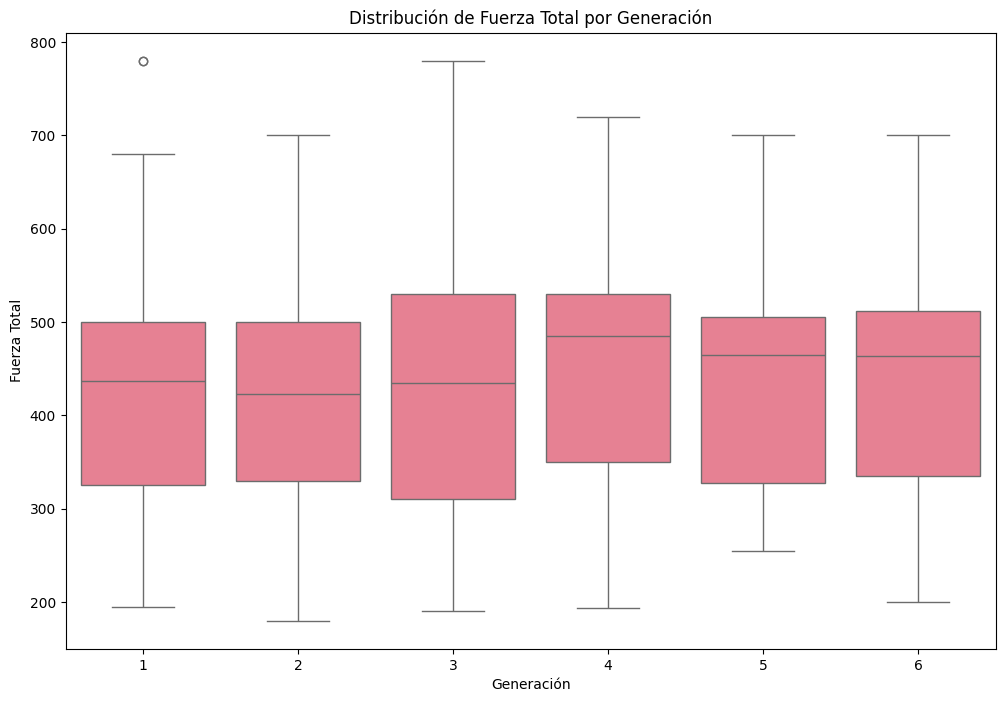

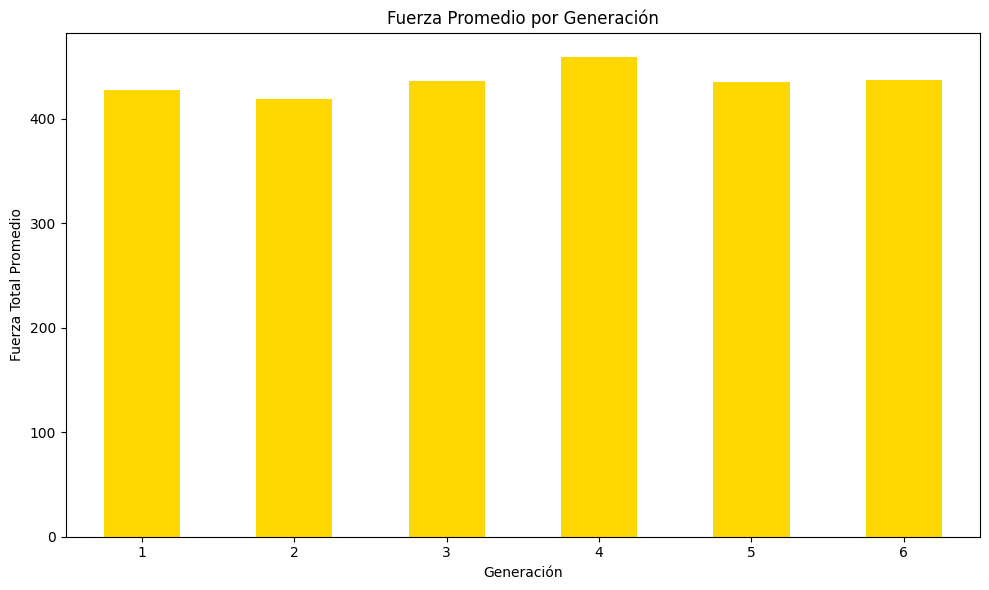

In [57]:
#Ejercicio 4.2: Comparación de fuerza entre generaciones

# Boxplot: Fuerza total por generación
plt.figure(figsize=(12, 8))
sns.boxplot(data=pokemon, x='Generation', y='Total')
plt.title('Distribución de Fuerza Total por Generación')
plt.xlabel('Generación')
plt.ylabel('Fuerza Total')
plt.show()

# Promedio de fuerza por generación
promedio_gen = pokemon.groupby('Generation')['Total'].mean()
plt.figure(figsize=(10, 6))
promedio_gen.plot(kind='bar', color='gold')
plt.title('Fuerza Promedio por Generación')
plt.xlabel('Generación')
plt.ylabel('Fuerza Total Promedio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Comparación Legendarios vs No Legendarios:
          Total                     HP  Attack Defense  Sp.Atk  Sp.Def   Speed
          count    mean     std   mean    mean    mean    mean    mean    mean
Legendary                                                                     
False       735  417.21  106.76  67.18   75.67   71.56   68.45   68.89   65.46
True         65  637.38   60.94  92.74  116.68   99.66  122.18  105.94  100.18


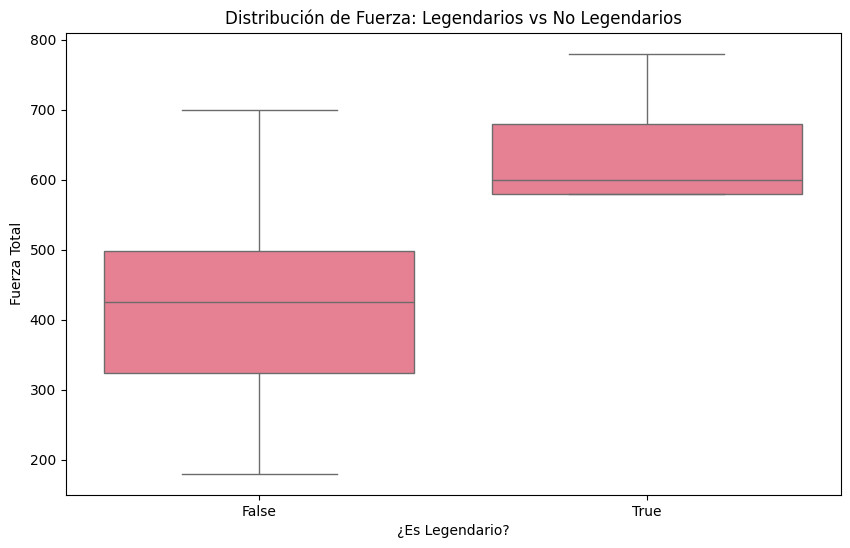

In [58]:
#Parte 5: Análisis de Pokémon Legendarios
#Ejercicio 5.1: Comparación Legendarios vs No Legendarios

# Estadísticas comparativas
legendary_stats = pokemon.groupby('Legendary').agg({
    'Total': ['count', 'mean', 'std'],
    'HP': 'mean',
    'Attack': 'mean',
    'Defense': 'mean',
    'Sp.Atk': 'mean',
    'Sp.Def': 'mean',
    'Speed': 'mean'
}).round(2)

print("Comparación Legendarios vs No Legendarios:")
print(legendary_stats)

# Boxplot: Fuerza total Legendarios vs No Legendarios
plt.figure(figsize=(10, 6))
sns.boxplot(data=pokemon, x='Legendary', y='Total')
plt.title('Distribución de Fuerza: Legendarios vs No Legendarios')
plt.xlabel('¿Es Legendario?')
plt.ylabel('Fuerza Total')
plt.show()

Legendarios por tipo primario:
Type1
Psychic     14
Dragon      12
Fire         5
Rock         4
Water        4
Steel        4
Electric     4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: count, dtype: int64


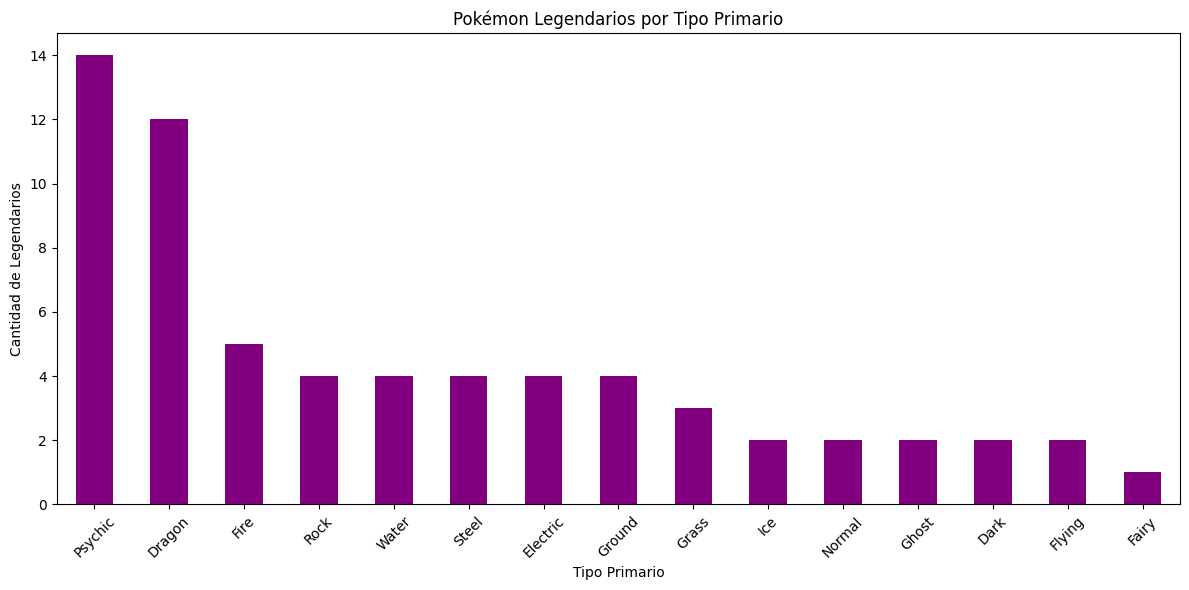


Legendarios por generación:
Generation
1     6
2     5
3    18
4    13
5    15
6     8
Name: count, dtype: int64


In [59]:
#Ejercicio 5.2: Legendarios por tipo y generación

# Legendarios por tipo primario
legendarios_tipo = pokemon[pokemon['Legendary'] == True]['Type1'].value_counts()
print("Legendarios por tipo primario:")
print(legendarios_tipo)

# Barplot: Legendarios por tipo
plt.figure(figsize=(12, 6))
legendarios_tipo.plot(kind='bar', color='purple')
plt.title('Pokémon Legendarios por Tipo Primario')
plt.xlabel('Tipo Primario')
plt.ylabel('Cantidad de Legendarios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Legendarios por generación
legendarios_gen = pokemon[pokemon['Legendary'] == True]['Generation'].value_counts().sort_index()
print("\nLegendarios por generación:")
print(legendarios_gen)

In [60]:
#Parte 6: Análisis Avanzado
#Ejercicio 6.1: Top Pokémon por categoría

# Top 10 Pokémon más fuertes
top_fuertes = pokemon.nlargest(10, 'Total')[['Name', 'Type1', 'Type2', 'Total', 'Legendary']]
print("Top 10 Pokémon más fuertes:")
print(top_fuertes)

# Top 5 por cada estadística principal
print("\n=== TOP 5 POR ESTADÍSTICA ===")
for stat in ['HP', 'Attack', 'Defense', 'Speed']:
    print(f"\nTop 5 en {stat}:")
    top_stat = pokemon.nlargest(5, stat)[['Name', stat, 'Type1']]
    print(top_stat.to_string(index=False))

Top 10 Pokémon más fuertes:
                        Name    Type1     Type2  Total  Legendary
163      MewtwoMega Mewtwo X  Psychic  Fighting    780       True
164      MewtwoMega Mewtwo Y  Psychic       NaN    780       True
426    RayquazaMega Rayquaza   Dragon    Flying    780       True
422      KyogrePrimal Kyogre    Water       NaN    770       True
424    GroudonPrimal Groudon   Ground      Fire    770       True
552                   Arceus   Normal       NaN    720       True
268  TyranitarMega Tyranitar     Rock      Dark    700      False
409  SalamenceMega Salamence   Dragon    Flying    700      False
413  MetagrossMega Metagross    Steel   Psychic    700      False
418        LatiasMega Latias   Dragon   Psychic    700       True

=== TOP 5 POR ESTADÍSTICA ===

Top 5 en HP:
     Name  HP   Type1
  Blissey 255  Normal
  Chansey 250  Normal
Wobbuffet 190 Psychic
  Wailord 170   Water
Alomomola 165   Water

Top 5 en Attack:
                   Name  Attack   Type1
    MewtwoM

Estadísticas: Tipo dual vs tipo simple
                 count        mean
Tiene_Tipo_Dual                   
False              386  412.015544
True               414  456.628019

Top 10 combinaciones de tipos:
      Type1     Type2  Cantidad
83   Normal    Flying        24
64    Grass    Poison        15
3       Bug    Flying        14
7       Bug    Poison        12
55    Ghost     Grass        10
130   Water    Ground        10
9       Bug     Steel         7
42     Fire  Fighting         7
120   Steel   Psychic         7
127   Water    Flying         7


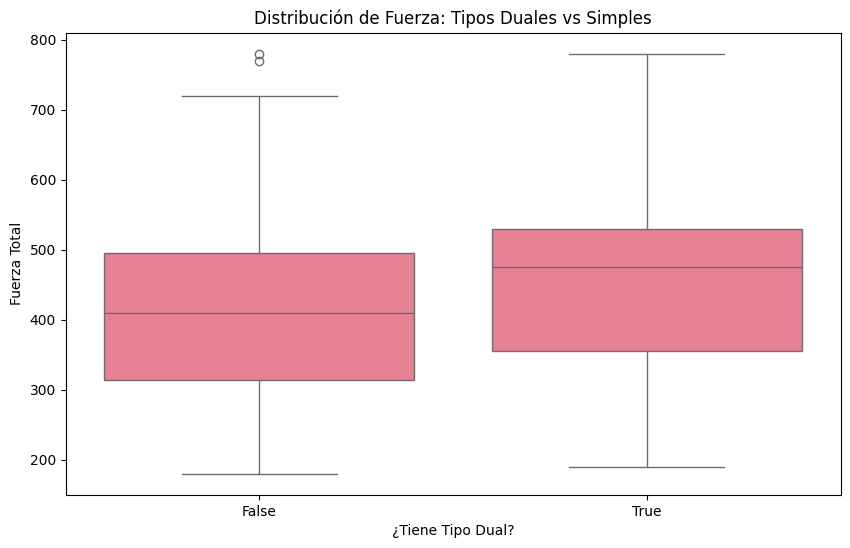

In [61]:
#Ejercicio 6.2: Análisis de tipos duales

# Pokémon con tipo dual vs tipo simple
pokemon['Tiene_Tipo_Dual'] = pokemon['Type2'].notna()
dual_stats = pokemon.groupby('Tiene_Tipo_Dual')['Total'].agg(['count', 'mean'])
print("Estadísticas: Tipo dual vs tipo simple")
print(dual_stats)

# Combinaciones de tipos más comunes
pokemon_duales = pokemon[pokemon['Type2'].notna()]
combinaciones = pokemon_duales.groupby(['Type1', 'Type2']).size().reset_index(name='Cantidad')
top_combinaciones = combinaciones.nlargest(10, 'Cantidad')
print("\nTop 10 combinaciones de tipos:")
print(top_combinaciones)

# Boxplot: Fuerza de tipos duales vs simples
plt.figure(figsize=(10, 6))
sns.boxplot(data=pokemon, x='Tiene_Tipo_Dual', y='Total')
plt.title('Distribución de Fuerza: Tipos Duales vs Simples')
plt.xlabel('¿Tiene Tipo Dual?')
plt.ylabel('Fuerza Total')
plt.show()

Top 10 Atacantes Especializados:
                     Name    Type1  Ataque_Total  Defensa_Total  \
429    DeoxysAttack Forme  Psychic           360             40   
347              Carvanha    Water           155             40   
428    DeoxysNormal Forme  Psychic           300            100   
750  AegislashBlade Forme    Steel           300            100   
348              Sharpedo    Water           215             80   
75             Bellsprout    Grass           145             65   
317               Whismur   Normal           102             46   
453              Cranidos     Rock           155             70   
478             Honchkrow     Dark           230            104   
393       AbsolMega Absol     Dark           265            120   

     Ratio_Ataque_Defensa  
429              9.000000  
347              3.875000  
428              3.000000  
750              3.000000  
348              2.687500  
75               2.230769  
317              2.217391  
453  

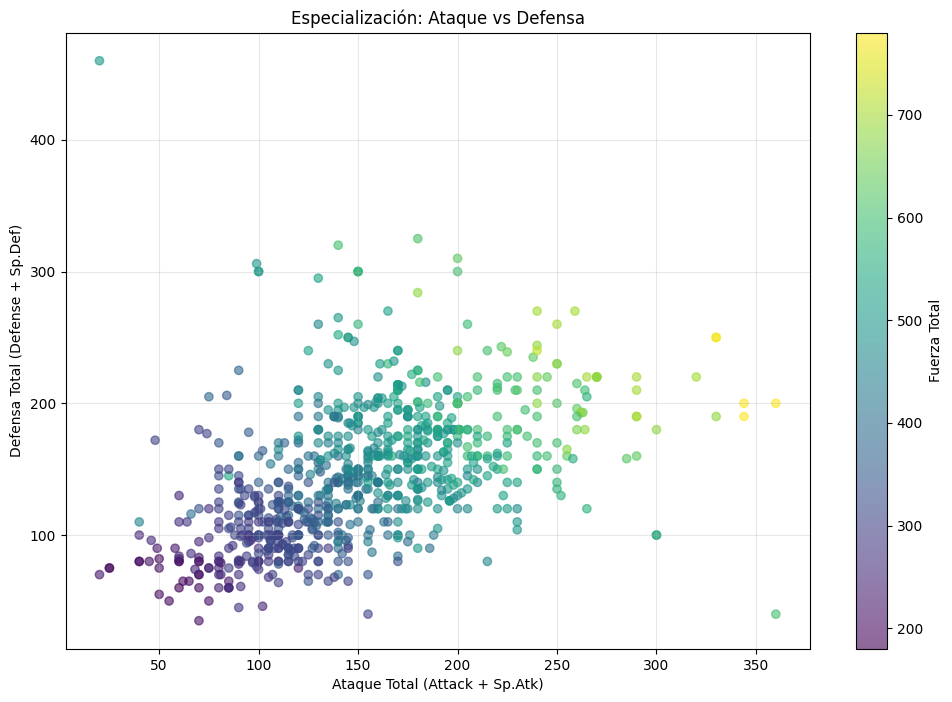

In [62]:
#Ejercicio 6.3: Análisis de especialización

# Crear métricas de especialización
pokemon['Ataque_Total'] = pokemon['Attack'] + pokemon['Sp.Atk']
pokemon['Defensa_Total'] = pokemon['Defense'] + pokemon['Sp.Def']
pokemon['Ratio_Ataque_Defensa'] = pokemon['Ataque_Total'] / pokemon['Defensa_Total']

# Encontrar especialistas extremos
atacantes_puros = pokemon.nlargest(10, 'Ratio_Ataque_Defensa')[['Name', 'Type1', 'Ataque_Total', 'Defensa_Total', 'Ratio_Ataque_Defensa']]
defensores_puros = pokemon.nsmallest(10, 'Ratio_Ataque_Defensa')[['Name', 'Type1', 'Ataque_Total', 'Defensa_Total', 'Ratio_Ataque_Defensa']]

print("Top 10 Atacantes Especializados:")
print(atacantes_puros)
print("\nTop 10 Defensores Especializados:")
print(defensores_puros)

# Scatter plot: Ataque vs Defensa total
plt.figure(figsize=(12, 8))
plt.scatter(pokemon['Ataque_Total'], pokemon['Defensa_Total'], alpha=0.6, c=pokemon['Total'], cmap='viridis')
plt.colorbar(label='Fuerza Total')
plt.xlabel('Ataque Total (Attack + Sp.Atk)')
plt.ylabel('Defensa Total (Defense + Sp.Def)')
plt.title('Especialización: Ataque vs Defensa')
plt.grid(True, alpha=0.3)
plt.show()

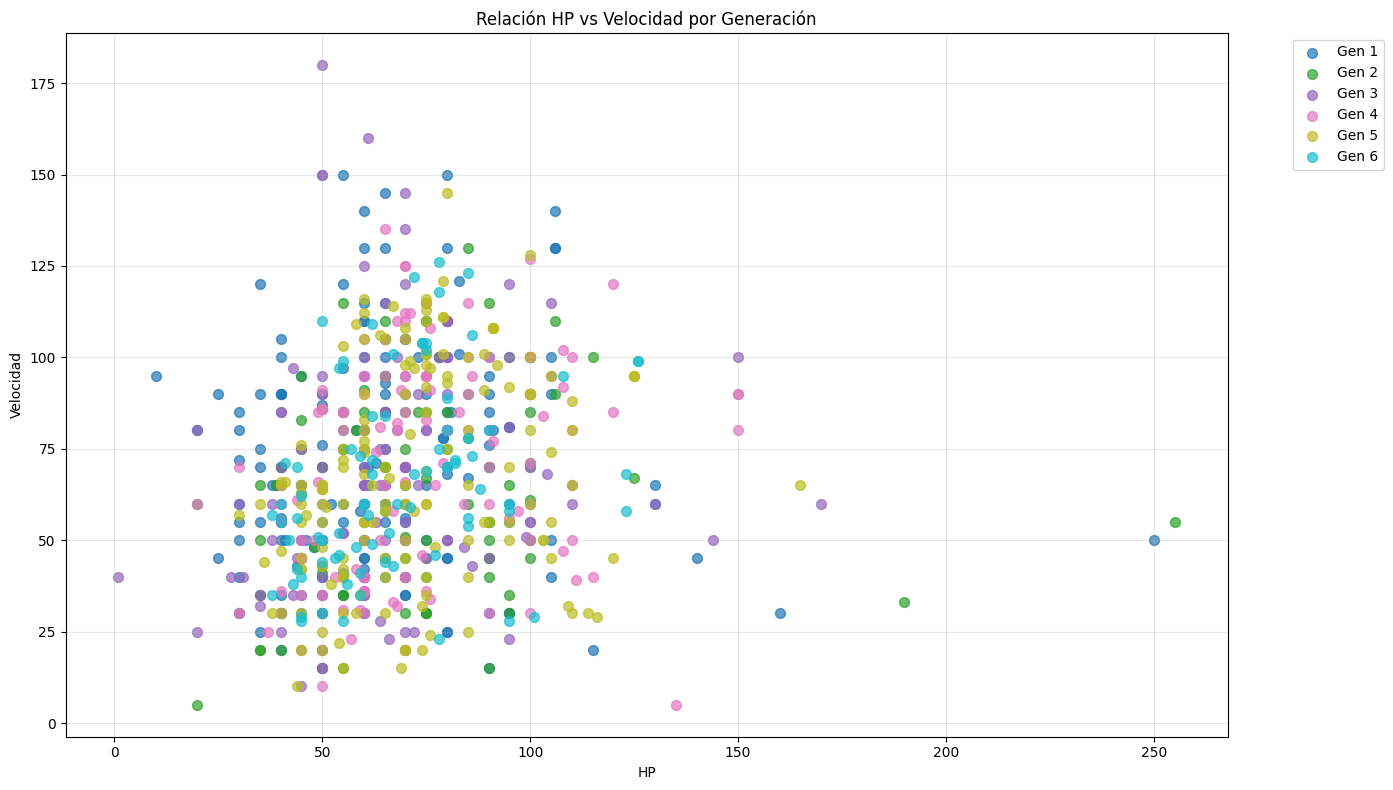

In [63]:
#Ejercicio 6.4: Scatter plot avanzado por generación

# Scatter plot: HP vs Speed, coloreado por generación
plt.figure(figsize=(14, 8))
generaciones = pokemon['Generation'].unique()
colores = plt.cm.tab10(np.linspace(0, 1, len(generaciones)))

for i, gen in enumerate(sorted(generaciones)):
    gen_data = pokemon[pokemon['Generation'] == gen]
    plt.scatter(gen_data['HP'], gen_data['Speed'],
               alpha=0.7, label=f'Gen {gen}', color=colores[i], s=50)

plt.xlabel('HP')
plt.ylabel('Velocidad')
plt.title('Relación HP vs Velocidad por Generación')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Distribución de arquetipos:
Arquetipo
Balanceado          667
Sweeper Especial     58
Tank Especial        30
Sweeper Físico       24
Tank Físico          11
Wall                 10
Name: count, dtype: int64


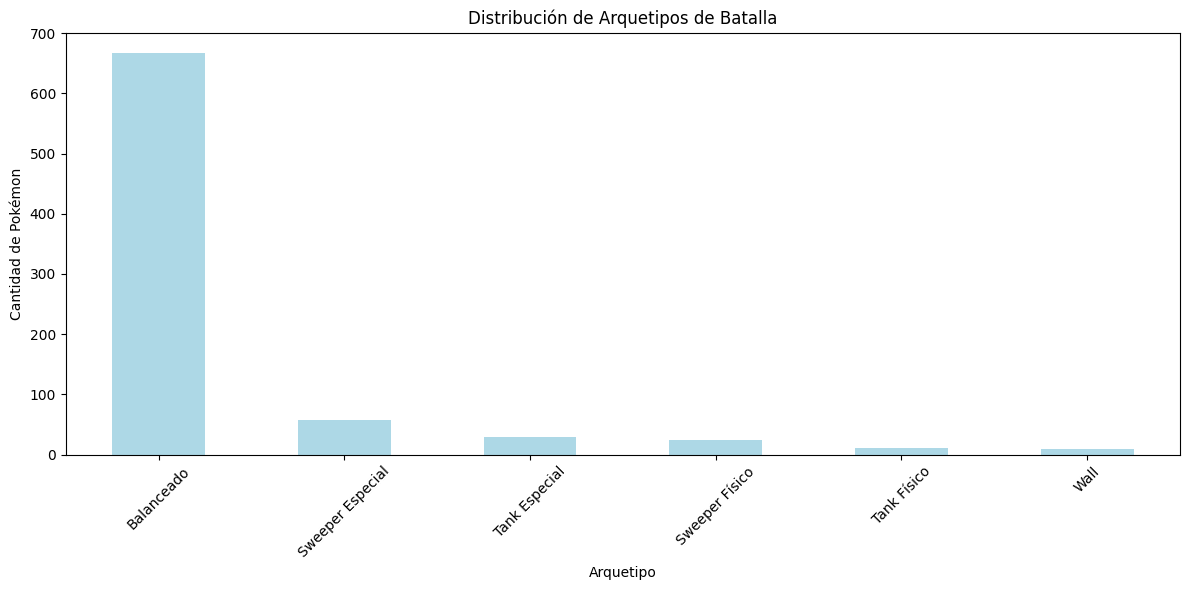


Estadísticas promedio por arquetipo:
                  Total     HP  Attack  Defense  Sp.Atk  Sp.Def  Speed
Arquetipo                                                             
Balanceado        405.8   64.7    73.4     71.4    66.2    68.3   61.7
Sweeper Especial  578.4   74.5    99.2     76.2   127.6    86.8  114.0
Sweeper Físico    529.6   75.8   118.6     80.0    65.0    76.4  113.8
Tank Especial     641.3  104.1   114.3    102.9   115.2   113.9   90.9
Tank Físico       592.3  107.2   127.9    124.0    86.3    76.5   70.4
Wall              543.3  179.0    78.3     62.7    74.3    83.7   65.3


In [64]:
#Parte 7: Análisis de Patrones Complejos
#Ejercicio 7.1: Análisis de arquetipas de batalla

# Definir arquetipos basados en estadísticas
pokemon['Arquetipo'] = 'Balanceado'
pokemon.loc[(pokemon['Speed'] >= 100) & (pokemon['Attack'] >= 100), 'Arquetipo'] = 'Sweeper Físico'
pokemon.loc[(pokemon['Speed'] >= 100) & (pokemon['Sp.Atk'] >= 100), 'Arquetipo'] = 'Sweeper Especial'
pokemon.loc[(pokemon['HP'] >= 100) & (pokemon['Defense'] >= 100), 'Arquetipo'] = 'Tank Físico'
pokemon.loc[(pokemon['HP'] >= 100) & (pokemon['Sp.Def'] >= 100), 'Arquetipo'] = 'Tank Especial'
pokemon.loc[pokemon['HP'] >= 150, 'Arquetipo'] = 'Wall'

# Contar arquetipos
arquetipo_counts = pokemon['Arquetipo'].value_counts()
print("Distribución de arquetipos:")
print(arquetipo_counts)

# Barplot de arquetipos
plt.figure(figsize=(12, 6))
arquetipo_counts.plot(kind='bar', color='lightblue')
plt.title('Distribución de Arquetipos de Batalla')
plt.xlabel('Arquetipo')
plt.ylabel('Cantidad de Pokémon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Estadísticas por arquetipo
arquetipo_stats = pokemon.groupby('Arquetipo')[['Total', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed']].mean().round(1)
print("\nEstadísticas promedio por arquetipo:")
print(arquetipo_stats)

Eficiencia promedio por tipo (tipos con 5+ Pokémon):
           mean     max  count
Type1                         
Dragon    91.76  130.00     32
Steel     81.28  116.67     27
Psychic   79.32  130.00     57
Fire      76.35  113.33     52
Rock      75.62  116.67     44
Dark      74.29  113.33     31
Electric  73.90  101.67     44
Ghost     73.26  113.33     32
Ground    72.92  128.33     32
Ice       72.24   96.67     24
Water     71.74  128.33    112
Grass     70.19  105.00     70
Fighting  69.41  104.17     27
Fairy     68.86  113.33     17
Normal    66.95  120.00     98
Poison    66.52   89.17     28
Bug       63.15  100.00     69


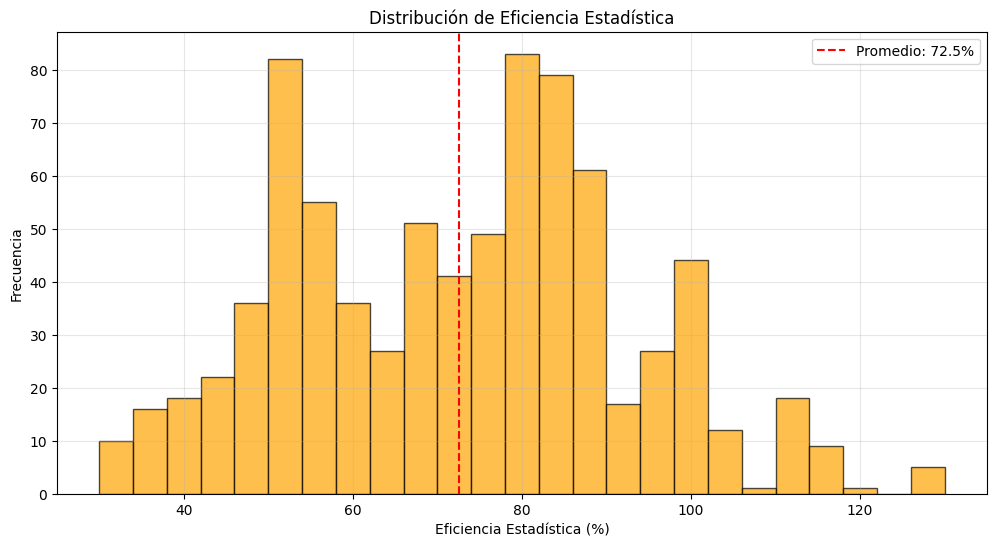

In [65]:
#Ejercicio 7.2: Análisis de eficiencia estadística

# Calcular eficiencia: Total / 600 (máximo teórico para stats base)
pokemon['Eficiencia'] = (pokemon['Total'] / 600) * 100

# Eficiencia por tipo
eficiencia_tipo = pokemon.groupby('Type1')['Eficiencia'].agg(['mean', 'max', 'count']).round(2)
eficiencia_tipo = eficiencia_tipo[eficiencia_tipo['count'] >= 5].sort_values('mean', ascending=False)
print("Eficiencia promedio por tipo (tipos con 5+ Pokémon):")
print(eficiencia_tipo)

# Histograma de eficiencia
plt.figure(figsize=(12, 6))
plt.hist(pokemon['Eficiencia'], bins=25, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(pokemon['Eficiencia'].mean(), color='red', linestyle='--',
           label=f'Promedio: {pokemon["Eficiencia"].mean():.1f}%')
plt.xlabel('Eficiencia Estadística (%)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Eficiencia Estadística')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Correlaciones más fuertes (|r| > 0.7):
Total - Eficiencia: 1.000
Ataque_Total - Eficiencia: 0.888
Total - Ataque_Total: 0.888
Defense - Defensa_Total: 0.885
Sp.Def - Defensa_Total: 0.853
Sp.Atk - Ataque_Total: 0.837
Attack - Ataque_Total: 0.834
Defensa_Total - Eficiencia: 0.762
Total - Defensa_Total: 0.762
Sp.Atk - Eficiencia: 0.747
Total - Sp.Atk: 0.747
Attack - Eficiencia: 0.736
Total - Attack: 0.736
Sp.Def - Eficiencia: 0.718
Total - Sp.Def: 0.718


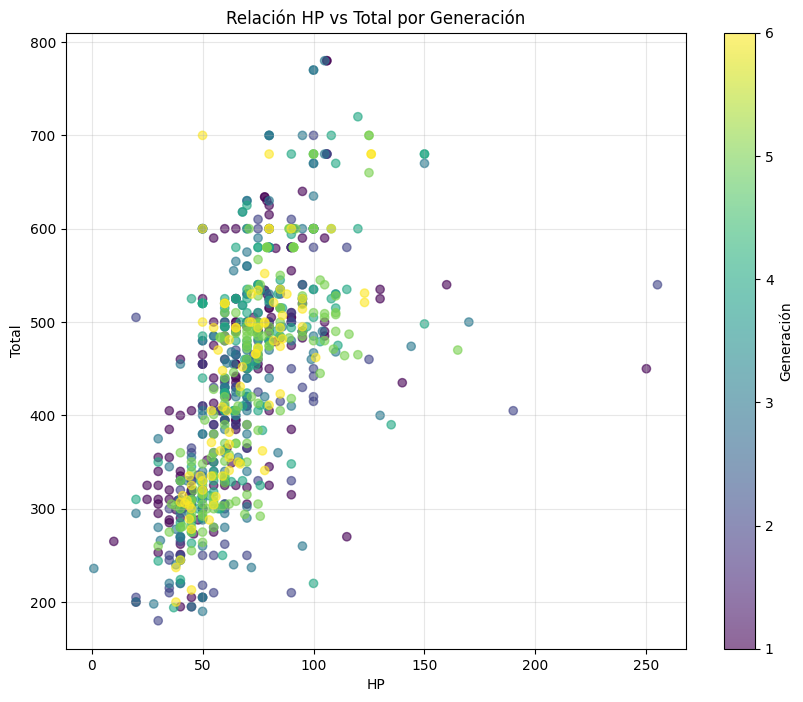

In [66]:
#Ejercicio 7.3: Correlaciones avanzadas

# Matriz de correlación extendida con nuevas métricas
metricas_extendidas = ['Total', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed',
                      'Ataque_Total', 'Defensa_Total', 'Eficiencia']
correlacion_ext = pokemon[metricas_extendidas].corr()

# Encontrar las correlaciones más fuertes (excluyendo diagonal)
correlaciones_fuertes = []
for i in range(len(correlacion_ext.columns)):
    for j in range(i+1, len(correlacion_ext.columns)):
        col1, col2 = correlacion_ext.columns[i], correlacion_ext.columns[j]
        corr_valor = correlacion_ext.iloc[i, j]
        if abs(corr_valor) > 0.7:  # Solo correlaciones fuertes
            correlaciones_fuertes.append((col1, col2, corr_valor))

print("Correlaciones más fuertes (|r| > 0.7):")
for col1, col2, valor in sorted(correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True):
    print(f"{col1} - {col2}: {valor:.3f}")

# Scatter plot de la correlación más interesante
plt.figure(figsize=(10, 8))
plt.scatter(pokemon['HP'], pokemon['Total'], alpha=0.6, c=pokemon['Generation'], cmap='viridis')
plt.colorbar(label='Generación')
plt.xlabel('HP')
plt.ylabel('Total')
plt.title('Relación HP vs Total por Generación')
plt.grid(True, alpha=0.3)
plt.show()

### Desafío 1: Tipo más balanceado
**Objetivo**: Encontrar qué tipo primario tiene Pokémon con estadísticas más equilibradas.

**Instrucciones**:
1. Calcula la desviación estándar de las 6 estadísticas de combate para cada Pokémon individual (usa `std(axis=1)`)
2. Agrupa por tipo primario y calcula el promedio de estas desviaciones
3. Ordena los resultados para encontrar los tipos más balanceados (menor desviación promedio)
4. Muestra los 5 tipos más balanceados en formato tabla
5. Crea un barplot con los 8 tipos más balanceados


Top 5 tipos más balanceados (menor desviación promedio de estadísticas):
Type1
Poison    13.952955
Flying    16.798371
Grass     17.529922
Fire      18.670020
Water     19.542094


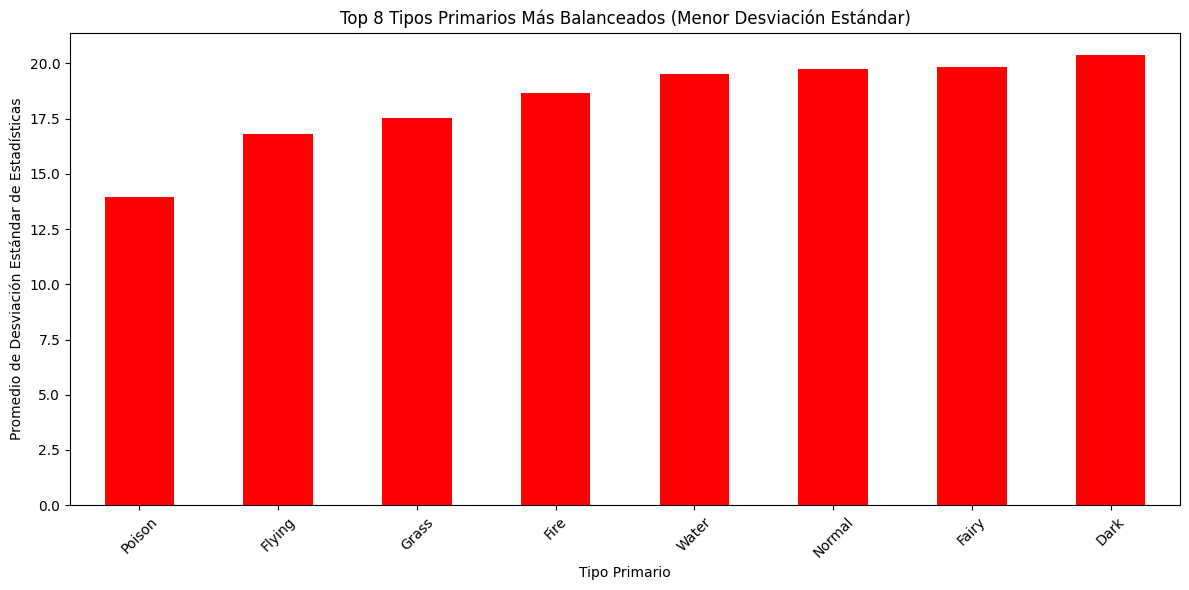

In [67]:
# Tu código aquí:
stats_combate = ['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed']
#1) Calcula la desviación estándar de las 6 estadísticas de combate para cada Pokémon individual
pokemon['Stats_Std'] = pokemon[stats_combate].std(axis=1)

#2) Agrupa por tipo primario y calcula el promedio de estas desviaciones
balance_por_tipo = pokemon.groupby('Type1')['Stats_Std'].mean()

#3) Ordena los resultados para encontrar los tipos más balanceados (menor desviación promedio)
balance_por_tipo = balance_por_tipo.sort_values()

#4) Muestra los 5 tipos más balanceados en formato tabla
print("Top 5 tipos más balanceados (menor desviación promedio de estadísticas):")
print(balance_por_tipo.head().to_string())

#5) Crea un barplot con los 8 tipos más balanceados
plt.figure(figsize=(12, 6))
balance_por_tipo.head(8).plot(kind='bar', color='red')
plt.title('Top 8 Tipos Primarios Más Balanceados (Menor Desviación Estándar)')
plt.xlabel('Tipo Primario')
plt.ylabel('Promedio de Desviación Estándar de Estadísticas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
stats_combate = ['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed']

### Desafío 2: Velocistas vs Tanques
**Objetivo**: Comparar Pokémon especializados en velocidad versus los especializados en defensa.

**Instrucciones**:
1. Define dos grupos:
   - **Velocistas**: Speed > 100 Y (Attack > 80 O Sp.Atk > 80)
   - **Tanques**: (HP + Defense) > 160 Y Speed < 60
2. Filtra el dataset para obtener cada grupo por separado
3. Calcula y muestra las estadísticas promedio de cada grupo
4. Cuenta cuántos Pokémon hay en cada categoría
5. Crea un scatter plot con Speed en X y (HP + Defense) en Y, diferenciando los tres grupos con colores: Velocistas, Tanques y Otros

Estadísticas promedio de Velocistas:
HP          74.8
Attack     101.1
Defense     75.6
Sp.Atk     103.8
Sp.Def      82.4
Speed      117.2
Total      555.0
dtype: float64

Estadísticas promedio de Tanques:
HP          89.5
Attack      89.3
Defense    109.1
Sp.Atk      71.0
Sp.Def      87.7
Speed       41.0
Total      487.5
dtype: float64

Cantidad de Velocistas: 94
Cantidad de Tanques: 99


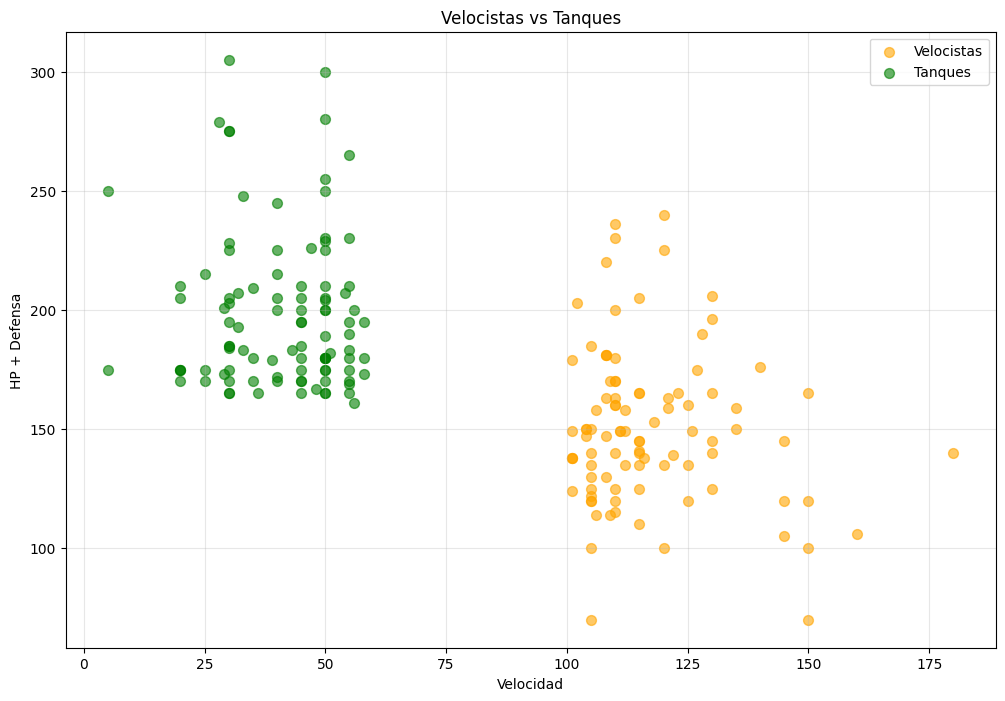

In [68]:
velocistas = pokemon[(pokemon['Speed'] > 100) & ((pokemon['Attack'] > 80) | (pokemon['Sp.Atk'] > 80))].copy()
tanques = pokemon[((pokemon['HP'] + pokemon['Defense']) > 160) & (pokemon['Speed'] < 60)].copy()
otros = pokemon[~pokemon.index.isin(velocistas.index) & ~pokemon.index.isin(tanques.index)].copy()


print("Estadísticas promedio de Velocistas:")
print(velocistas[['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed', 'Total']].mean().round(1))
print("\nEstadísticas promedio de Tanques:")
print(tanques[['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed', 'Total']].mean().round(1))


print(f"\nCantidad de Velocistas: {len(velocistas)}")
print(f"Cantidad de Tanques: {len(tanques)}")

plt.figure(figsize=(12, 8))

plt.scatter(velocistas['Speed'], velocistas['HP'] + velocistas['Defense'], alpha=0.6, label='Velocistas', color='orange', s=50)
plt.scatter(tanques['Speed'], tanques['HP'] + tanques['Defense'], alpha=0.6, label='Tanques', color='green', s=50)


plt.xlabel('Velocidad')
plt.ylabel('HP + Defensa')
plt.title('Velocistas vs Tanques')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Desafío 4: Análisis de dominancia por tipo
**Objetivo**: Identificar qué tipos dominan en diferentes aspectos del combate y crear un ranking de versatilidad.

**Instrucciones**:
1. Para cada tipo primario, calcula el promedio de cada una de las 6 estadísticas de combate
2. Identifica qué tipo tiene el promedio más alto en cada estadística individual (crear un "ranking de dominancia")
3. Crea una métrica de "versatilidad" que sea el número de estadísticas donde el tipo está en el top 5
4. Encuentra los 3 tipos más versátiles y muestra sus estadísticas promedio
5. Crea un barplot horizontal mostrando la versatilidad (cantidad de stats en top 5) para todos los tipos que tengan al menos 1 estadística en top 5


Estadísticas promedio por tipo primario:
            HP  Attack  Defense  Sp.Atk  Sp.Def  Speed
Type1                                                 
Bug       56.9    71.0     70.7    53.9    64.8   61.7
Dark      66.8    88.4     70.2    74.6    69.5   76.2
Dragon    83.3   112.1     86.4    96.8    88.8   83.0
Electric  59.8    69.1     66.3    90.0    73.7   84.5
Fairy     74.1    61.5     65.7    78.5    84.7   48.6
Fighting  69.9    96.8     65.9    53.1    64.7   66.1
Fire      69.9    84.8     67.8    89.0    72.2   74.4
Flying    70.8    78.8     66.2    94.2    72.5  102.5
Ghost     64.4    73.8     81.2    79.3    76.5   64.3
Grass     67.3    73.2     70.8    77.5    70.4   61.9
Ground    73.8    95.8     84.8    56.5    62.8   63.9
Ice       72.0    72.8     71.4    77.5    76.3   63.5
Normal    77.3    73.5     59.8    55.8    63.7   71.6
Poison    67.2    74.7     68.8    60.4    64.4   63.6
Psychic   70.6    71.5     67.7    98.4    86.3   81.5
Rock      65.4    92.9  

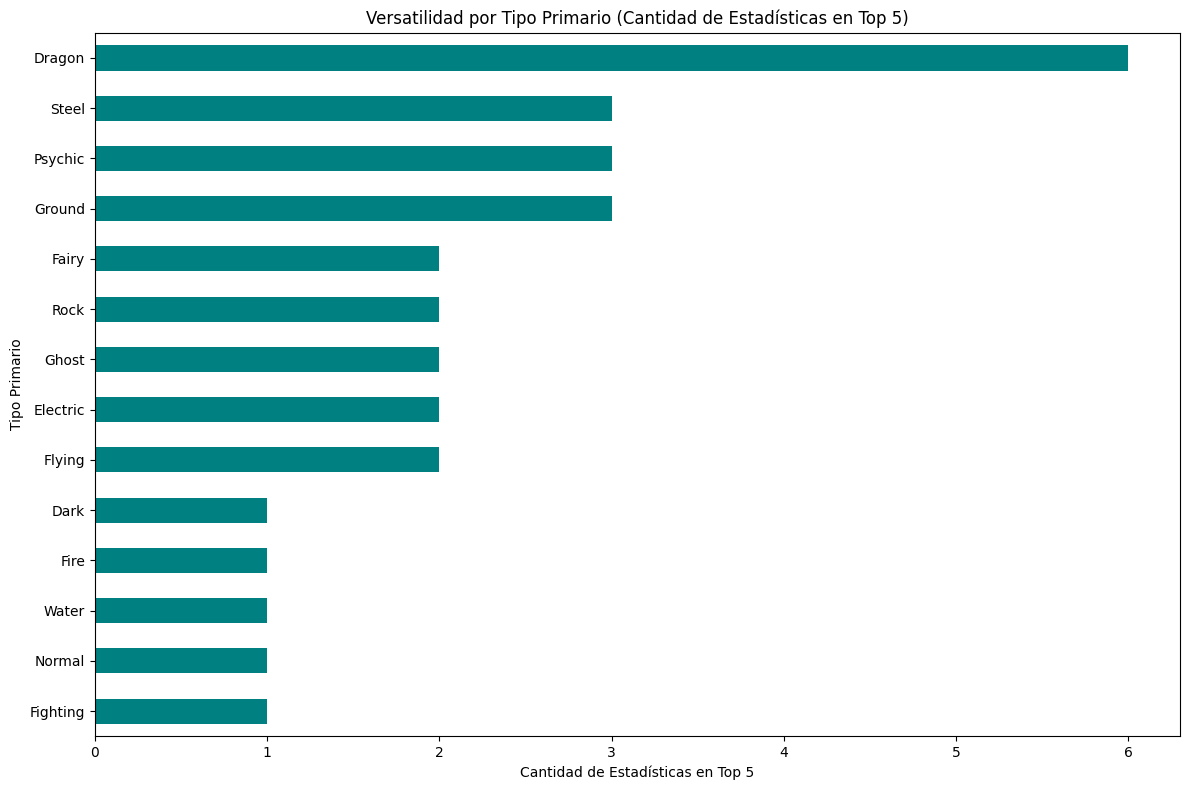

In [69]:
stats_combate = ['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed']

avg_stats_por_tipo = pokemon.groupby('Type1')[stats_combate].mean()
print("Estadísticas promedio por tipo primario:")
print(avg_stats_por_tipo.round(1))


dominancia = avg_stats_por_tipo.idxmax()
print("\nTipo dominante por estadística:")
print(dominancia)


top_n = 5
versatilidad = {}
for index, row in avg_stats_por_tipo.iterrows():
    type_name = index
    top_stats_count = 0
    for stat in stats_combate:
        # Check if the current type's average for this stat is in the top N
        if avg_stats_por_tipo[stat].nlargest(top_n).index.isin([type_name]).any():
             top_stats_count += 1
    versatilidad[type_name] = top_stats_count

versatilidad_series = pd.Series(versatilidad).sort_values(ascending=False)


top_3_versatiles = versatilidad_series.head(3).index
print("\nTop 3 tipos más versátiles:")
print(avg_stats_por_tipo.loc[top_3_versatiles].round(1))

versatilidad_filtrada = versatilidad_series[versatilidad_series > 0]

plt.figure(figsize=(12, 8))
versatilidad_filtrada.sort_values().plot(kind='barh', color='teal')
plt.title('Versatilidad por Tipo Primario (Cantidad de Estadísticas en Top 5)')
plt.xlabel('Cantidad de Estadísticas en Top 5')
plt.ylabel('Tipo Primario')
plt.tight_layout()
plt.show()
stats_combate = ['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed']

### Desafío 5: Detección de outliers por generación
**Objetivo**: Encontrar Pokémon que son inusualmente fuertes o débiles comparados con su generación.

**Instrucciones**:
1. Para cada generación, calcula la media y desviación estándar de 'Total'
2. Identifica Pokémon "outliers" en cada generación usando el criterio: |Total - Media| > 2 * Desviación_Estándar
3. Separa los outliers en dos grupos: "Excepcionalmente Fuertes" y "Excepcionalmente Débiles"
4. Cuenta cuántos outliers hay por generación y muestra el Pokémon más extremo de cada generación
5. Crea un scatter plot con Generation en X y Total en Y, destacando los outliers con colores diferentes
6. BONUS: Calcula qué porcentaje de outliers son legendarios vs no legendarios

Media y desviación estándar de 'Total' por generación:
              mean     std
Generation                
1           426.81  115.88
2           418.28  120.11
3           436.22  136.31
4           459.02  119.56
5           434.99  108.12
6           436.38  114.95

Pokémon Excepcionalmente Fuertes (Outliers):
                        Name    Type1  Total  Generation  Legendary
162                   Mewtwo  Psychic    680           1       True
163      MewtwoMega Mewtwo X  Psychic    780           1       True
164      MewtwoMega Mewtwo Y  Psychic    780           1       True
268  TyranitarMega Tyranitar     Rock    700           2      False
269                    Lugia  Psychic    680           2       True
270                    Ho-oh     Fire    680           2       True
422      KyogrePrimal Kyogre    Water    770           3       True
424    GroudonPrimal Groudon   Ground    770           3       True
426    RayquazaMega Rayquaza   Dragon    780           3       True
494

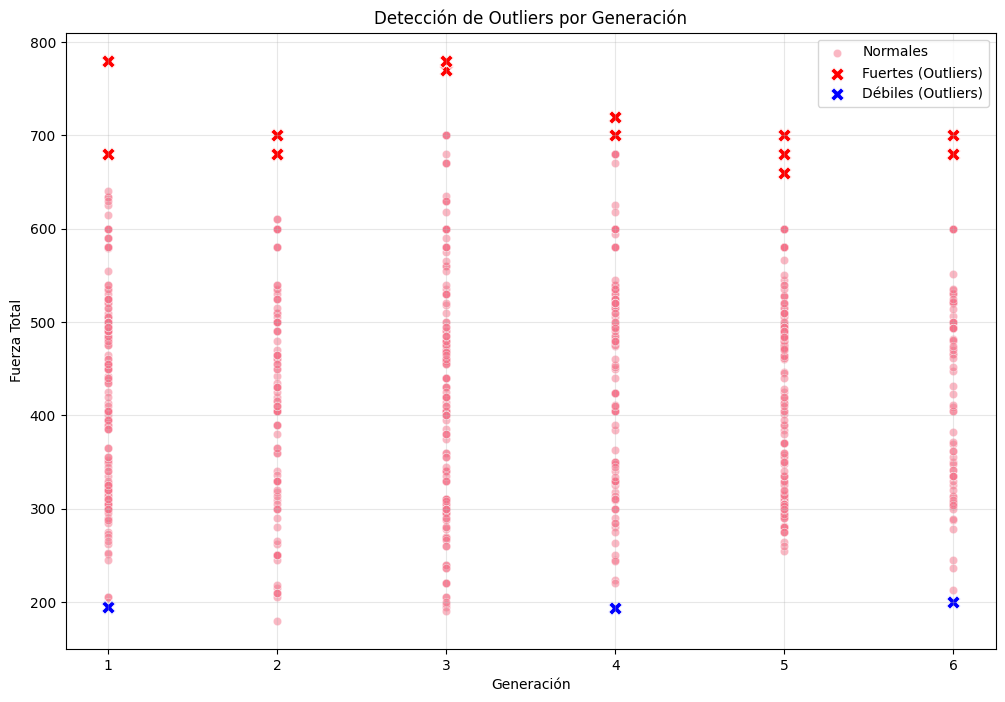


Porcentaje de outliers Legendarios: 75.00%
Porcentaje de outliers No Legendarios: 25.00%


In [70]:
gen_stats_summary = pokemon.groupby('Generation')['Total'].agg(['mean', 'std']).round(2)
print("Media y desviación estándar de 'Total' por generación:")
print(gen_stats_summary)


outliers = pd.DataFrame()
for gen in pokemon['Generation'].unique():
    gen_data = pokemon[pokemon['Generation'] == gen].copy()
    mean_total = gen_stats_summary.loc[gen, 'mean']
    std_total = gen_stats_summary.loc[gen, 'std']
    gen_outliers = gen_data[abs(gen_data['Total'] - mean_total) > 2 * std_total]
    outliers = pd.concat([outliers, gen_outliers])


outliers['Generation_Mean_Total'] = outliers['Generation'].map(gen_stats_summary['mean'])

outliers_fuertes = outliers[outliers['Total'] > outliers['Generation_Mean_Total']].copy()
outliers_debiles = outliers[outliers['Total'] <= outliers['Generation_Mean_Total']].copy()

print("\nPokémon Excepcionalmente Fuertes (Outliers):")
print(outliers_fuertes[['Name', 'Type1', 'Total', 'Generation', 'Legendary']])

print("\nPokémon Excepcionalmente Débiles (Outliers):")
print(outliers_debiles[['Name', 'Type1', 'Total', 'Generation', 'Legendary']])


print("\nCantidad de Outliers por Generación:")
print(outliers['Generation'].value_counts().sort_index())

print("\nPokémon más extremo por Generación (mayor o menor 'Total'):")
extremos_gen_strong = outliers_fuertes.loc[outliers_fuertes.groupby('Generation')['Total'].idxmax().dropna()]
extremos_gen_weak = outliers_debiles.loc[outliers_debiles.groupby('Generation')['Total'].idxmin().dropna()]


print("\nMás Fuerte:")
print(extremos_gen_strong[['Name', 'Total', 'Generation']])
print("\nMás Débil:")
print(extremos_gen_weak[['Name', 'Total', 'Generation']])


plt.figure(figsize=(12, 8))

sns.scatterplot(data=pokemon, x='Generation', y='Total', alpha=0.5, label='Normales')
sns.scatterplot(data=outliers_fuertes, x='Generation', y='Total', color='red', label='Fuertes (Outliers)', s=100, marker='X')
sns.scatterplot(data=outliers_debiles, x='Generation', y='Total', color='blue', label='Débiles (Outliers)', s=100, marker='X')


plt.xlabel('Generación')
plt.ylabel('Fuerza Total')
plt.title('Detección de Outliers por Generación')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(sorted(pokemon['Generation'].unique()))
plt.show()


outliers_legendarios_count = outliers['Legendary'].sum()
outliers_no_legendarios_count = len(outliers) - outliers_legendarios_count

print(f"\nPorcentaje de outliers Legendarios: {(outliers_legendarios_count / len(outliers) * 100):.2f}%")
print(f"Porcentaje de outliers No Legendarios: {(outliers_no_legendarios_count / len(outliers) * 100):.2f}%")

### Desafío 6: Análisis de meta-game por estadísticas combinadas
**Objetivo**: Crear nuevas métricas de combate y analizar qué tipos serían mejores en diferentes "formatos" de batalla.

**Instrucciones**:
1. Crea 4 nuevas métricas:
   - **Poder_Ofensivo**: (Attack + Sp.Atk) * 0.6 + Speed * 0.4
   - **Poder_Defensivo**: (HP * 2 + Defense + Sp.Def) / 4
   - **Utilidad_General**: (HP + Defense + Sp.Def + Speed) / 4
   - **Potencial_Sweep**: Attack * Sp.Atk * Speed / 10000
2. Para cada métrica, encuentra el top 3 de Pokémon y el top 3 de tipos primarios (por promedio)
3. Determina qué tipo primario es el "más completo" (mejor promedio combinando las 4 métricas)
4. Crea un histograma comparativo entre Pokémon legendarios y no legendarios para la métrica "Potencial_Sweep"
5. Haz un boxplot comparando "Poder_Defensivo" entre las primeras 3 generaciones vs las últimas 3 generaciones


=== ANÁLISIS POR MÉTRICAS COMBINADAS ===

--- Poder Ofensivo ---
Top 3 Pokémon por Poder Ofensivo:
                 Name   Type1  Poder_Ofensivo
   DeoxysAttack Forme Psychic           276.0
  MewtwoMega Mewtwo Y Psychic           262.4
RayquazaMega Rayquaza  Dragon           262.0

Top 3 Tipos Primarios por Poder Ofensivo (Promedio):
Type1
Dragon     158.59
Flying     144.80
Psychic    134.51
Name: Poder_Ofensivo, dtype: float64

--- Poder Defensivo ---
Top 3 Pokémon por Poder Defensivo:
                 Name  Type1  Poder_Defensivo
              Blissey Normal           163.75
              Chansey Normal           152.50
GiratinaAltered Forme  Ghost           135.00

Top 3 Tipos Primarios por Poder Defensivo (Promedio):
Type1
Dragon    85.46
Steel     84.36
Rock      76.75
Name: Poder_Defensivo, dtype: float64

--- Utilidad General ---
Top 3 Pokémon por Utilidad General:
                 Name   Type1  Utilidad_General
                Lugia Psychic            125.00
              Shu

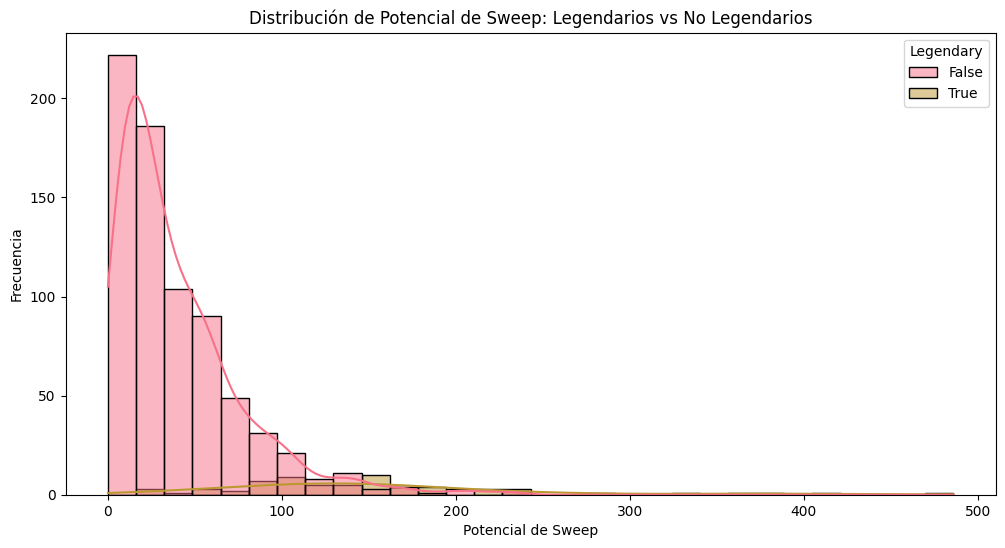

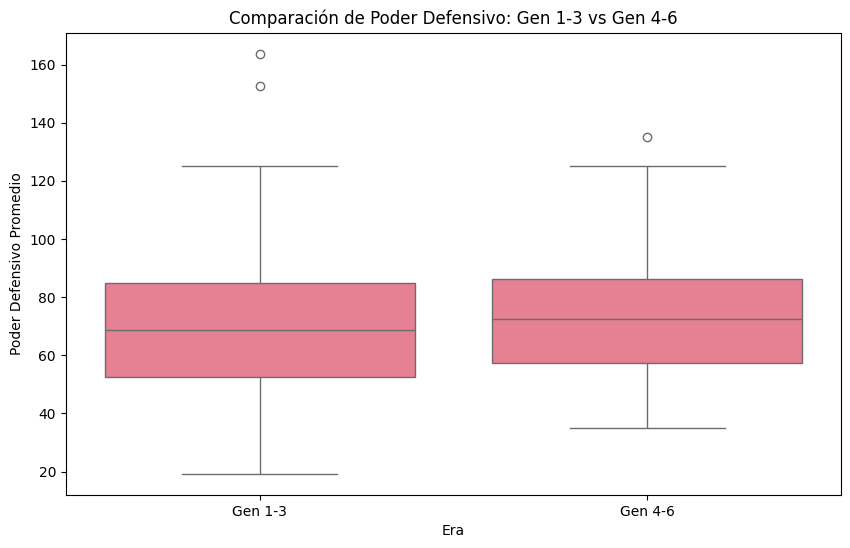

In [71]:
pokemon['Poder_Ofensivo'] = (pokemon['Attack'] + pokemon['Sp.Atk']) * 0.6 + pokemon['Speed'] * 0.4
pokemon['Poder_Defensivo'] = (pokemon['HP'] * 2 + pokemon['Defense'] + pokemon['Sp.Def']) / 4
pokemon['Utilidad_General'] = (pokemon['HP'] + pokemon['Defense'] + pokemon['Sp.Def'] + pokemon['Speed']) / 4
pokemon['Potencial_Sweep'] = pokemon['Attack'] * pokemon['Sp.Atk'] * pokemon['Speed'] / 10000


metricas_nuevas = ['Poder_Ofensivo', 'Poder_Defensivo', 'Utilidad_General', 'Potencial_Sweep']

print("=== ANÁLISIS POR MÉTRICAS COMBINADAS ===")

for metrica in metricas_nuevas:
    print(f"\n--- {metrica.replace('_', ' ')} ---")

    top_pokemon = pokemon.nlargest(3, metrica)[['Name', 'Type1', metrica]].round(2)
    print(f"Top 3 Pokémon por {metrica.replace('_', ' ')}:")
    print(top_pokemon.to_string(index=False))

    top_tipos = pokemon.groupby('Type1')[metrica].mean().nlargest(3).round(2)
    print(f"\nTop 3 Tipos Primarios por {metrica.replace('_', ' ')} (Promedio):")
    print(top_tipos)


ranked_types = pd.DataFrame()
for metrica in metricas_nuevas:
    ranked_types[metrica] = pokemon.groupby('Type1')[metrica].mean().rank(ascending=False)

ranked_types['Promedio_Rank'] = ranked_types.mean(axis=1)

tipo_mas_completo = ranked_types['Promedio_Rank'].idxmin()
print(f"\nTipo Primario más completo (mejor promedio de rank): {tipo_mas_completo}")

print("\nRankings promedio por tipo:")
print(ranked_types.sort_values('Promedio_Rank').round(1))


plt.figure(figsize=(12, 6))

sns.histplot(data=pokemon, x='Potencial_Sweep', hue='Legendary', kde=True, bins=30)
plt.title('Distribución de Potencial de Sweep: Legendarios vs No Legendarios')
plt.xlabel('Potencial de Sweep')
plt.ylabel('Frecuencia')
plt.show()


pokemon['Era'] = pokemon['Generation'].apply(lambda x: 'Gen 1-3' if x <= 3 else 'Gen 4-6')

plt.figure(figsize=(10, 6))
sns.boxplot(data=pokemon, x='Era', y='Poder_Defensivo')
plt.title('Comparación de Poder Defensivo: Gen 1-3 vs Gen 4-6')
plt.xlabel('Era')
plt.ylabel('Poder Defensivo Promedio')
plt.show()